In [233]:
# 4. (ggplot2를 이용한 시계열 그래프 그리기). 최근 장단기 금리차가 역전되면서 경기침체의 우려가 확산되고 있다.
# 글로벌 금융위기 직전인 2007년 이후, 12년 만에 미국에서 장기 국채(10년물)의 금리가 단기 국채(2년물 혹은 3개월) 
# 금리보다 낮아지는 현상이 발생했다. 다음의 기사를 참조하기 바란다.
# http://www.donga.com/news/article/all/20190324/94711678/1

# 아래의 두 그림을 살펴보면 미국에서 총 3번 이상의 장단기 금리역전 현상이 있었으며 금리역전 후 1-2년이 지났을 때 대체로 
# 경제위기(회색으로 표시)가 뒤따랐음을 확인할 수 있다. ggplot()을 이용하여 아래의 두 그림을 2000년 1월 이후 현재까지의 데이터를 
# 이용하여 재생성(reproduce)하도록 하라. 실제 금융자료와 그림은 다음 사이트에서 내려받을 수 있다.
# https://fred.stlouisfed.org/series/DGS10#0
library(ggplot2)
library(gridExtra)

# Monthly 로 뽑았지만, Daily 로 Aggregate 를 Mean 으로 잡고 해도 가능하다.

T10Y2Y <- read.csv("./4-1_T10Y2Y.csv", header = T)
WILL5000INDFC <- read.csv("./4-2_WILL5000INDFC.csv", header = T)
DGS10 <- read.csv("./4-3_DGS10.csv", header = T)
DGS5 <- read.csv("./4-4_DGS5.csv", header = T)
DGS2 <- read.csv("./4-5_DGS2.csv", header = T)
DGS1 <- read.csv("./4-6_DGS1.csv", header = T)

TreasuryConstant <- data.frame(as.POSIXct(T10Y2Y$DATE, format="%Y-%m-%d")
                               , T10Y2Y$T10Y2Y, WILL5000INDFC$WILL5000INDFC, DGS10$DGS10, DGS5$DGS5, DGS2$DGS2, DGS1$DGS1)
colnames(TreasuryConstant) <- c('DATE', 'T10Y2Y', 'WILL5000INDFC', 'DGS10', 'DGS5', 'DGS2', 'DGS1')
head(TreasuryConstant)
str(TreasuryConstant)

DATE,T10Y2Y,WILL5000INDFC,DGS10,DGS5,DGS2,DGS1
1989-01-01,-0.0840000,7.031905,9.091500,9.148500,9.175500,9.047500
1989-02-01,-0.2026316,7.282632,9.168947,9.270526,9.371579,9.253158
1989-03-01,-0.3218182,7.292727,9.357727,9.514091,9.679545,9.570455
1989-04-01,-0.2760000,7.532500,9.175500,9.295000,9.451500,9.363000
1989-05-01,-0.1586364,7.844545,8.859091,8.909545,9.017727,8.977273
1989-06-01,-0.1290909,8.113636,8.277273,8.292273,8.406364,8.440909


'data.frame':	369 obs. of  7 variables:
 $ DATE         : POSIXct, format: "1989-01-01" "1989-02-01" ...
 $ T10Y2Y       : num  -0.084 -0.203 -0.322 -0.276 -0.159 ...
 $ WILL5000INDFC: num  7.03 7.28 7.29 7.53 7.84 ...
 $ DGS10        : num  9.09 9.17 9.36 9.18 8.86 ...
 $ DGS5         : num  9.15 9.27 9.51 9.29 8.91 ...
 $ DGS2         : num  9.18 9.37 9.68 9.45 9.02 ...
 $ DGS1         : num  9.05 9.25 9.57 9.36 8.98 ...


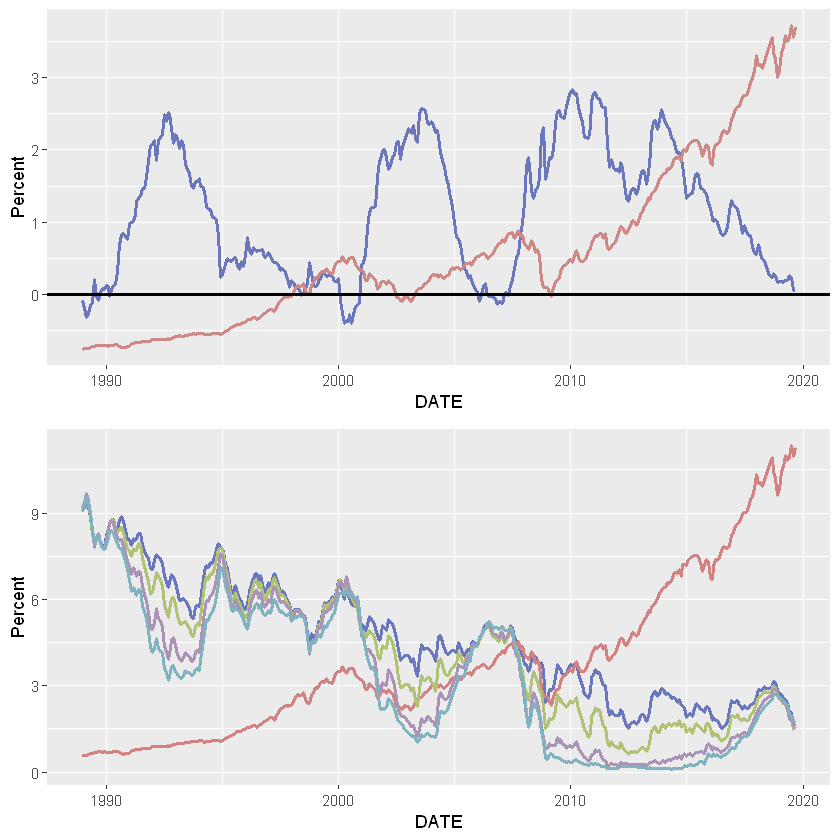

In [264]:
# 아래의 그림을 보면 왼쪽과 오른쪽의 y값이 서로 다른 스케일을 가지고 있음을 알 수 있다. 
# 즉, 두 개의 다른 스케일을 가진 여러 그래프를 하나의 그림 안에 그렸다. 
# 이를 ggplot()에서 구현하기 위해 다음의 도움말을 참고하도록 하라. 
# https://stackoverflow.com/questions/51132115/plot-with-ggplot-a-graph-with-two-y-scales

p1 <- ggplot() + 
    geom_line(data = TreasuryConstant, aes(x=DATE, y=T10Y2Y), color='#6B77BC', lwd=1) +
    geom_line(data = TreasuryConstant, aes(x=DATE, y=WILL5000INDFC/30-1), color='#CE8986', lwd=1) +
    geom_hline(yintercept=0, lwd=1) + labs(y = "Percent")

p2 <- ggplot() + 
    geom_line(data = TreasuryConstant, aes(x=DATE, y=DGS10), color='#6B77BC', lwd = 1) +
    geom_line(data = TreasuryConstant, aes(x=DATE, y=WILL5000INDFC/12.5), color='#D28282', lwd = 1) +
    geom_line(data = TreasuryConstant, aes(x=DATE, y=DGS5), color='#B0C274', lwd = 1) +
    geom_line(data = TreasuryConstant, aes(x=DATE, y=DGS2), color='#AA93B7', lwd = 1) +
    geom_line(data = TreasuryConstant, aes(x=DATE, y=DGS1), color='#80B2BF', lwd = 1) + labs(y = "Percent")

grid.arrange(p1, p2, nrow = 2)